# BIOMEDICAL IMAGE ANALYSIS IN PYTHON



# CHAPTER 1: EXPLORATION #

Prepare to conquer the Nth dimension! To begin the course, you'll learn how to load, build and navigate N-dimensional images using a CT image of the human chest. You'll also leverage the useful ImageIO package and hone your NumPy and matplotlib skills.




## IMAGE DATA

### Course objectives
Fortunately, there are fantastic tools and a wealth of resources to support you. In this course, we'll focus on several principles underlying biomedical image analysis. You'll learn how to explore multidimensional arrays, emphasize important features using masks and filters, extract specific measurements from objects, and compare multiple images or patients. While this only scratches the surface of the field, it will give you a firm foundation for advanced concepts like classification and segmentation. Throughout, we'll rely on packages in Python's core scientific computing ecosystem: ImageIO, NumPy, SciPy, and matplotlib. Let's dive in.

### Loading Images

To warm up, let's load and plot a single image. We can read in images using the ImageIO package. Its imread() function will take a single file and load it as an image object. One useful feature of ImageIO is that it can read DICOM files, the standard format for human medical imaging. The data is read in as an image object, which is a type of NumPy array.

To access specific values from your image, you can slice out a single value or a range of index values along each dimension.

In this chapter, we'll work with sections of a computed tomography (CT) scan [link text](https://en.wikipedia.org/wiki/CT_scan) from [The Cancer Imaging Archive](http://www.cancerimagingarchive.net/about-the-cancer-imaging-archive-tcia/). CT uses a rotating X-ray tube to create a 3D image of the target area.

The actual content of the image depends on the instrument used: photographs measure visible light, x-ray and CT measure radiation absorbance, and MRI scanners measure magnetic fields.

To warm up, use the imageio package to load a single DICOM image from the scan volume and check out a few of its attributes.

### Install Packages

In [2]:
!pip install imageio

ERROR: Could not find a version that satisfies the requirement imageio (from versions: none)
ERROR: No matching distribution found for imageio


In [2]:
!pip install matplotlib

## Exercise: Load images

In [1]:
# Import ImageIO
import imageio.v2 as imageio

# Load "chest-220.dcm"
ct_image = imageio.imread('./Data/dicom_00000001_000.dcm')

# Print image attributes
print('Image type:', type(ct_image))
print('Shape of image array:', ct_image.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (1024, 1024)


### Metadata ##

Images are always acquired in a specific context. This information is often referred to as metadata. ImageIO loads available metadata into a dictionary, accessible through the meta attribute. This is especially important for DICOM files, which contain a lot of patient and acquisition information. Since meta is a Python dictionary, you can access specific information by indexing it with one of the available keys. This file, for example, includes a modality field. You can also call the keys method to list all of the available metadata.

ImageIO reads in data as Image objects. These are standard NumPy arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:

*   Patient demographics: name, age, sex, clinical information
*   Acquisition information: image shape, sampling rates, data type, modality (such as X-Ray, CT or MRI)

Start this exercise by reading in the chest image and listing the available fields in the meta dictionary.

In [2]:
ct_image.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.7'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.11129.5.5.153751009835107614666834563294684339746480'),
      ('Modality', 'DX'),
      ('StudyDescription', 'Cardiomegaly'),
      ('PatientID', '1'),
      ('PatientSex', 'M '),
      ('PatientAge', '58'),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.11129.5.5.111396399361969898205364400549799252857604'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.11129.5.5.195628213694300498946760767481291263511724'),
      ('SamplesPerPixel', 1),
      ('Rows', 1024),
      ('Columns', 1024),
      ('BitsAllocated', 8),
      ('BitsStored', 8),
      ('HighBit', 7),
      ('PixelRepresentation', 0),
      ('PixelData',
       b'Data converted to numpy array, raw data removed to preserve memory'),
      ('shape', (1024, 1024)),
      ('sampling', (1.0, 1.0))])

In [3]:
#Print available metadata fields:
print(ct_image.meta.keys())

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'Modality', 'StudyDescription', 'PatientID', 'PatientSex', 'PatientAge', 'StudyInstanceUID', 'SeriesInstanceUID', 'SamplesPerPixel', 'Rows', 'Columns', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'PixelData', 'shape', 'sampling'])


In [4]:
print(ct_image.meta['PatientSex'])

M 


In [5]:
print(ct_image.meta['StudyDescription'])

Cardiomegaly


In [6]:
print(ct_image.meta['PatientAge'])

58


### Plotting images
Visualization is fundamental to image analysis, and we'll rely heavily on matplotlib and its imshow() function throughout this course. To draw a simple plot of a 2D image, first, import the PyPlot module from matplotlib. Next, call pyplot dot imshow() and pass in the 2D image. If the image does not have color, add "cmap equals gray" to plot it in grayscale. Next, to reduce clutter, it's common to turn off the axis ticks, labels, and frame with pyplot dot axis off. Finally, call show() to render the image.

In [7]:
# Import ImageIO and PyPlot 
# import imageio.v2 as imageio
import matplotlib.pyplot as plt

img = imageio.imread('./Data/dicom_00000001_000.dcm')

In [8]:
img.shape

(1024, 1024)

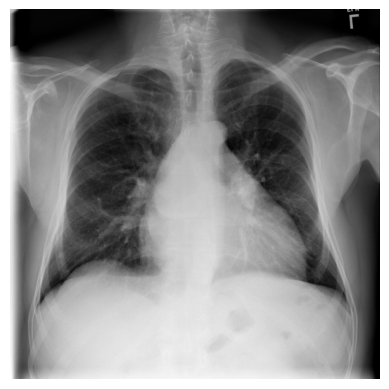

In [11]:
plt.imshow(img)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

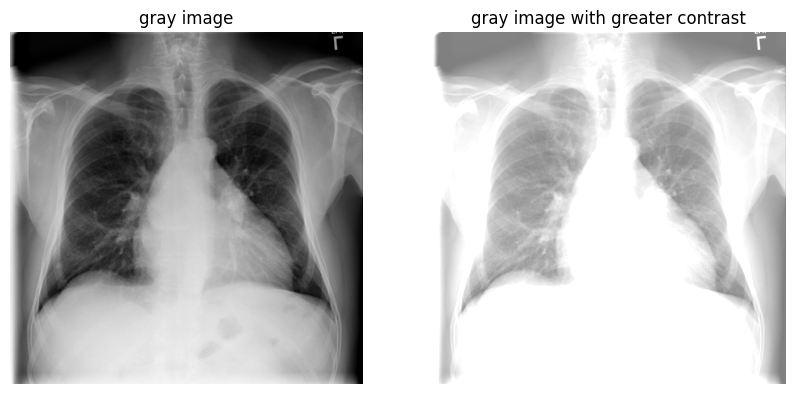

In [12]:
fig, axes = plt.subplots(1,2, figsize=(10,10))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('gray image')

axes[1].imshow(img, cmap='gray',vmin=-150, vmax=150)
axes[1].set_title('gray image with greater contrast')

for ax in axes:
    ax.axis('off')
    
plt.show()

## N-DIMENSIONAL IMAGES
Now that you can load and plot two-dimensional images let's discuss higher dimensional datasets.

### Images of all shapes and sizes
Images come in all shapes and sizes. This makes them versatile, but also complex. A standard grayscale image is the simplest type: it's an array that can be indexed by rows and columns.

3D images cover a volume of space rather than just a single plane. This volumetric data is useful because it can better capture the complexities of the human body, but it can be difficult to visualize because it can't be summarized in a single plot.

Color images are also three dimensional. RGB images, for example, have three color channels that, when rendered by matplotlib or other image viewers, express a wide range of colors.

Movies, or time series data, include a temporal dimension, showing how each element changes over time. Like the planar dimension for 3D volumes, the temporal dimension is put first by convention.

In [13]:
# Stacking multiple images

# Import ImageIO and NumPy
import imageio.v2 as imageio
import numpy as np

# Read in each 2D image

im1 = imageio.imread('./Data/ChestData/1.dcm')
im2 = imageio.imread('./Data/ChestData/2.dcm')
im3 = imageio.imread('./Data/ChestData/3.dcm')

In [14]:
print(im1.shape, im2.shape, im3.shape)

(512, 512) (512, 512) (512, 512)


In [15]:
# Stack images into a volume
vol = np.stack([im1, im2, im3], axis=0)

print('Volume dimensions:', vol.shape)

Volume dimensions: (3, 512, 512)


### Loading volumes directly
ImageIO's **volread()** function is capable of reading volumes directly from disk, whether your images are stored in their own folder, or if the dataset is already multi-dimensional. In this example, we have a folder named "ChestData" which contains 30 slices of a 3D volume. We simply have to pass the folder name to volread(), and it will assemble the volume for us. Since these are DICOM images, the function actually checks the available metadata to make sure that the images are placed in the correct order. Otherwise, it will default to alphabetical order. Displaying the shape attribute shows us that we have 30 images stacked together.

In [16]:
import os
os.listdir('./Data/ChestData')

['1.dcm',
 '10.dcm',
 '11.dcm',
 '12.dcm',
 '13.dcm',
 '14.dcm',
 '15.dcm',
 '16.dcm',
 '17.dcm',
 '18.dcm',
 '19.dcm',
 '2.dcm',
 '20.dcm',
 '21.dcm',
 '22.dcm',
 '23.dcm',
 '24.dcm',
 '25.dcm',
 '26.dcm',
 '27.dcm',
 '28.dcm',
 '29.dcm',
 '3.dcm',
 '30.dcm',
 '4.dcm',
 '5.dcm',
 '6.dcm',
 '7.dcm',
 '8.dcm',
 '9.dcm']

In [17]:
# Import ImageIO
import imageio.v2 as imageio

# Load the directory of dcm images:
vol = imageio.volread('./Data/ChestData',format='DICOM')

Reading DICOM (examining files): 1/30 files (3.3%4/30 files (13.311/30 files (36.7%20/30 files (66.7%30/30 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 14/30  (46.723/30  (76.730/30  (100.0%)


In [18]:
print('Shape of image array:', vol.shape)

Shape of image array: (30, 512, 512)


In [19]:
# Print image attributes
print('Available metadata:', vol.meta.keys())

Available metadata: odict_keys(['TransferSyntaxUID', 'SOPInstanceUID', 'Modality', 'Manufacturer', 'PatientName', 'PatientID', 'PatientSex', 'StudyInstanceUID', 'SeriesInstanceUID', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])


### Shape, sampling, and field of view
When analyzing images, keep in mind that the data is only a representation of real, physical space. The information in your images is limited to the number of elements in it. This is known as the array shape in NumPy and is always available as an attribute. The amount of space covered by each element is the sampling rate, and it can vary along each dimension. For DICOM images, the sampling rate is usually encoded in the metadata. For other types of image formats, such as JPEG and PNG, you may need to find it elsewhere. The field of view is the total amount of space covered along each axis. It is the product of the shape and sampling rate. Understanding the difference between these concepts is important, and we'll return to it throughout this course.

## ADVANCED PLOTTING

In [20]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt 
vol = imageio.volread('./Data/ChestData/', format="DICOM")

Reading DICOM (examining files): 1/30 files (3.3%30/30 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 30/30  (100.0%)


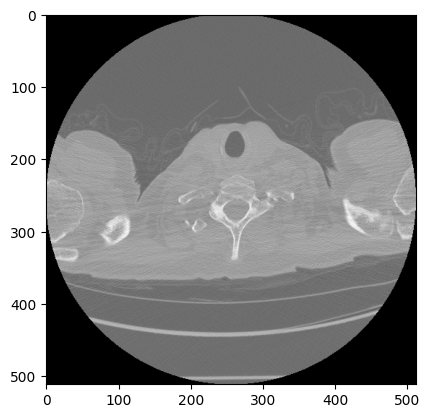

In [21]:
plt.imshow(vol[0], cmap='gray')
# plt.imshow(vol[0], cmap='gray', vmin=-270, vmax=270)
plt.show()

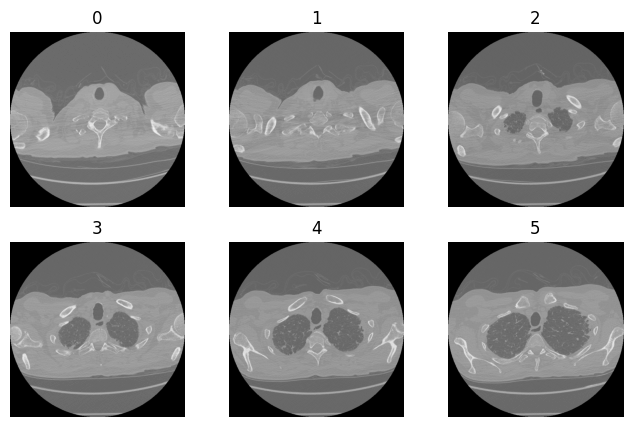

In [22]:
WIDTH_SIZE = 8
HEIGHT_SIZE = 5
plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    ax.imshow(vol[i], cmap='gray')
    ax.set_title(f"{i}")
    ax.set_axis_off()

plt.show()

# CHAPTER 2: MASKS AND FILTERS

<h1>Biomedical Image Analysis in Python (Part - 2)</h1>

<h2>Intensity</h2>
we will work with a hand <b>radiograph</b> from a 2017 <b>Radiological Society of North America competition</b>. X-ray absorption is highest in dense tissue such as bone, so the resulting intensities should be high. Consequently, images like this can be used to predict "bone age" in children.<br>
To start, let's load the image and check its intensity range.<br>
The image datatype determines the range of possible intensities: e.g., 8-bit unsigned integers (uint8) can take values in the range of 0 to 255. A colorbar can be helpful for connecting these values to the visualized image.

Data type: uint8
Min. value: 0
Max value: 255


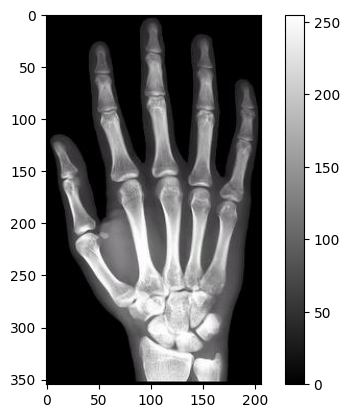

In [24]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt

# Load the hand radiograph
im = imageio.imread("./Images/hand_xray.jpg")
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im, cmap='gray')
plt.colorbar()

<h2>Create a mask</h2>
Masks are the primary method for removing or selecting specific parts of an image. They are binary arrays that indicate whether a value should be included in an analysis. Typically, masks are created by applying one or more logical operations to an image.

We will try to use a simple intensity threshold to differentiate between skin and bone in the hand radiograph. (im has been equalized to utilize the whole intensity range.)

In [25]:
im >= 140

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

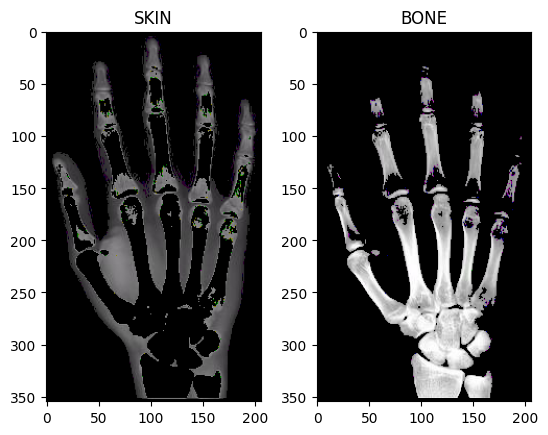

In [26]:
# Create skin and bone masks

im_bone = np.where(im >= 140, im, 0)


im_skin = np.where((im >= 45) & (im < 140), im, 0)

# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(im_skin, cmap='gray')
axes[0].set_title("SKIN")
axes[1].imshow(im_bone, cmap='gray')
axes[1].set_title("BONE")

plt.show()

<h2>Tune a mask</h2>
Imperfect masks can be tuned through the addition and subtraction of pixels. SciPy includes several useful methods for accomplishing these ends. These include:

binary_dilation: Add pixels along edges<br>
binary_erosion: Remove pixels along edges<br>
binary_opening: Erode then dilate, "opening" areas near edges<br>
binary_closing: Dilate then erode, "filling in" holes<br><br>
Here we will create a bone mask then tune it to include additional pixels.

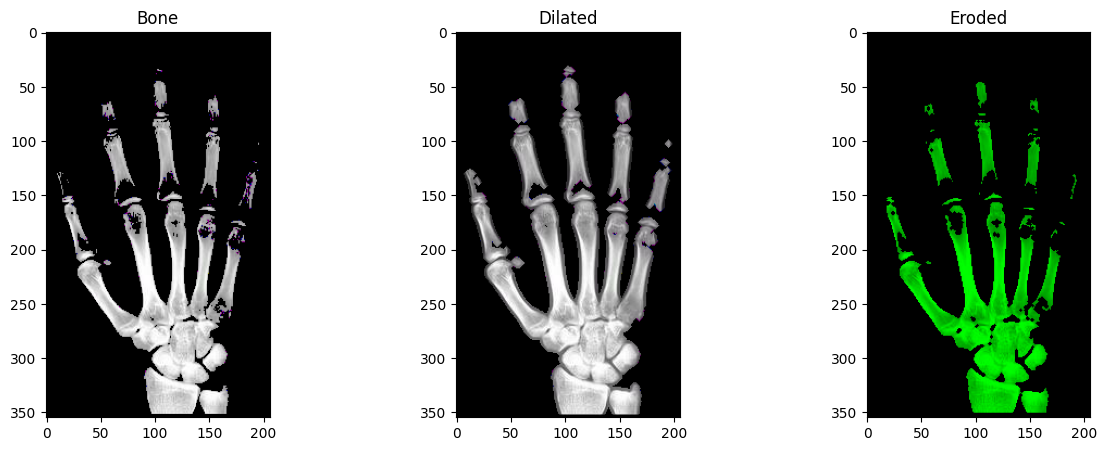

In [27]:
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

# Create and tune bone mask
im_bone = np.where(im >= 145, im, 0)

dilation_mask = ndi.binary_dilation(im_bone, iterations=3)
dilated_img = np.where(dilation_mask, im, 0)

erosion_maks = ndi.binary_erosion(im_bone, iterations=1)
eroded_img = np.where(erosion_maks, im, 0)

# Plot masked images
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(im_bone,     cmap='gray')
axes[1].imshow(dilated_img, cmap='gray')
axes[2].imshow(eroded_img, cmap='gray')


# Set titles for subplots
axes[0].set_title('Bone')
axes[1].set_title('Dilated')
axes[2].set_title('Eroded')
# Display the plot
plt.show()


<h2>Filter Convolutions</h2>
Filters are an essential tool in image processing. They allow you to transform images based on intensity values surrounding a pixel, rather than globally.

Here we will smooth the foot radiograph. First, specify the weights to be used. (These are called "footprints" and "kernels" as well.) Then, convolve the filter with im and plot the result.

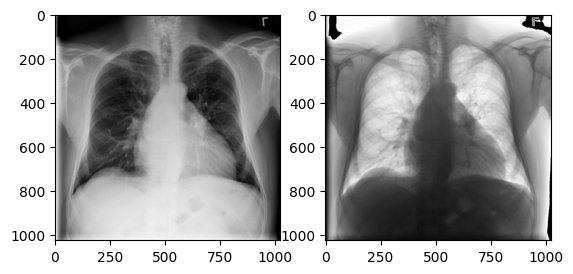

In [28]:
# Set filter weights
weights = [[0, 0, 0],
           [-1, 1,-1], 
           [0, 0, 0]]

# Import ImageIO and PyPlot 
import imageio.v2 as imageio
import numpy as np
im = imageio.imread('./Data/dicom_00000001_000.dcm')

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im, cmap='gray')
axes[1].imshow(im_filt, cmap='gray')

<h2>Smoothing</h2>
Smoothing can improve the signal-to-noise ratio of your image by blurring out small variations in intensity. The Gaussian filter is excellent for this: it is a circular (or spherical) smoothing kernel that weights nearby pixels higher than distant ones.

The width of the distribution is controlled by the sigma argument, with higher values leading to larger smoothing effects.

Here we will test the effects of applying Gaussian filters to the foot x-ray before creating a bone mask.

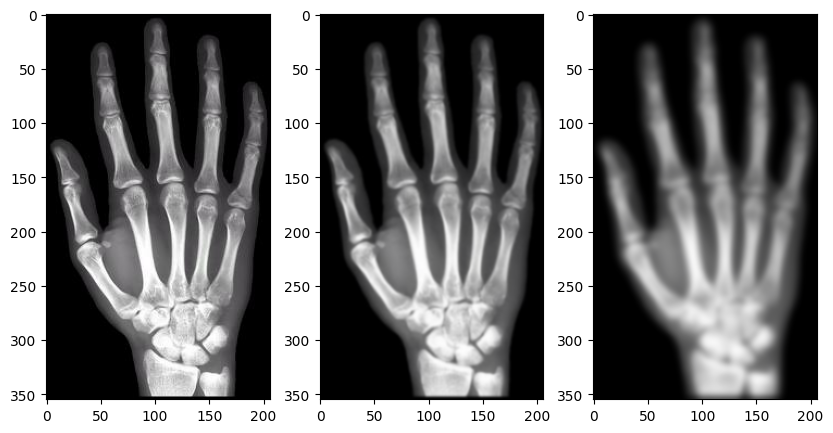

In [29]:
im = imageio.imread('./Images/hand_xray.jpg')
# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3, figsize=(10,5))
axes[0].imshow(im, cmap='gray')
axes[1].imshow(im_s1, cmap='gray')
axes[2].imshow(im_s3, cmap='gray')

<h2>Detect Edges (1)</h2>
Filters can also be used as "detectors." If a part of the image fits the weighting pattern, the returned value will be very high (or very low).

In the case of edge detection, that pattern is a change in intensity along a plane. Here we will create a vertical edge detector and see how well it performs on the hand x-ray (im).

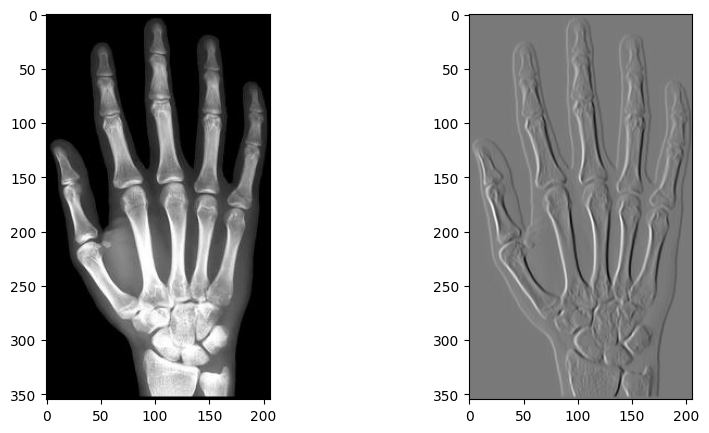

In [31]:
# Set weights to detect vertical edges
import scipy.ndimage as ndi
import imageio.v2 as imageio

weights = [[+1, 0, -1], 
           [+1, 0, -1], 
           [+1, 0, -1]]

im = imageio.imread('./Images/hand_xray.jpg', mode='F')

# Convolve "im" with filter weights
edges = ndi.convolve(im, weights)

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].imshow(im, cmap='gray')
axes[1].imshow(edges, cmap='gray')

plt.show()

<h2>Detect Edges (2)</h2>
Edge detection can be performed along multiple axes, then combined into a single edge value. For 2D images, the horizontal and vertical "edge maps" can be combined using the Pythagorean theorem:

z=√(x^2+y^2)

One popular edge detector is the Sobel filter. The Sobel filter provides extra weight to the center pixels of the detector:
weights = [[ 1,  2,  1], 
           [ 0,  0,  0],
           [-1, -2, -1]]
Here we will improve upon our previous detection effort by merging the results of two Sobel-filtered images into a composite edge map.


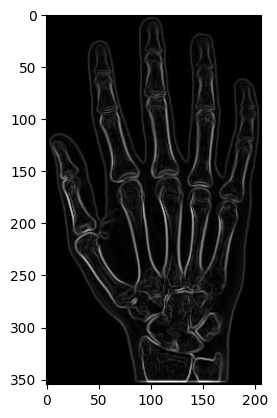

In [32]:
# Apply Sobel filter along both axes
im = imageio.imread('./Images/hand_xray.jpg', mode='F')

sobel_ax0 = ndi.sobel(im, axis=0)
sobel_ax1 = ndi.sobel(im, axis=1)

# Calculate edge magnitude 
edges = np.sqrt(np.square(sobel_ax0) + np.square(sobel_ax1))

# # Plot edge magnitude
plt.imshow(edges, cmap="gray")

# CHAPTER 3: MEASUREMENT
Objects and Labels
In this chapter, we'll discuss how you can measure one or more component parts of your image. We'll start by learning how to label objects.

### Segmentation
Segmentation is the process of splitting an image into separate objects. Since whole careers can be spent developing segmentation techniques, we will focus mostly on how to analyze the resulting objects.

In [212]:
import imageio.v2 as imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

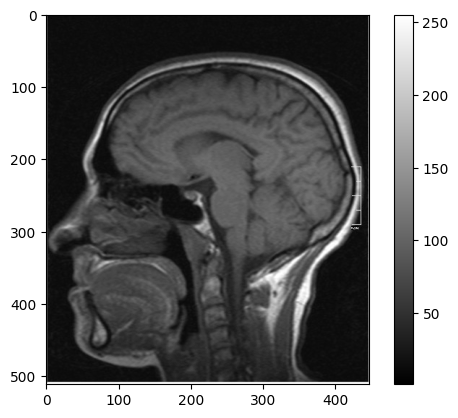

In [284]:
im = imageio.imread("./Images/MRI.png", mode="F")
plt.imshow(im, cmap="gray")
plt.colorbar()
plt.show()

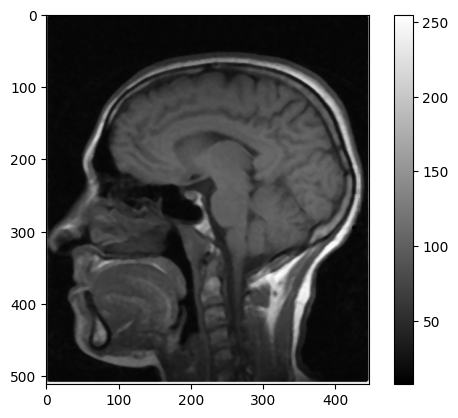

In [296]:
# Smooth intensity values
im_filt = ndi.median_filter(im, size=5)
plt.imshow(im_filt, cmap="gray")
plt.colorbar()
plt.show()

In [304]:
# Select high-intensity pixels
mask_start = np.where(im_filt > 60, 1, 0)
mask = ndi.binary_closing(mask_start, iterations=2)

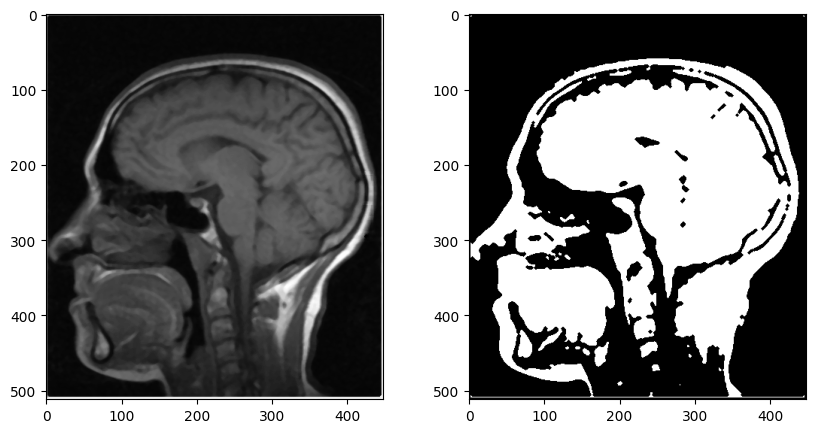

In [305]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].imshow(im_filt, cmap='gray')
axes[1].imshow(mask, cmap='gray')

plt.show()

In [306]:
# Label the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Num. Labels:',nlabels)

Num. Labels: 28


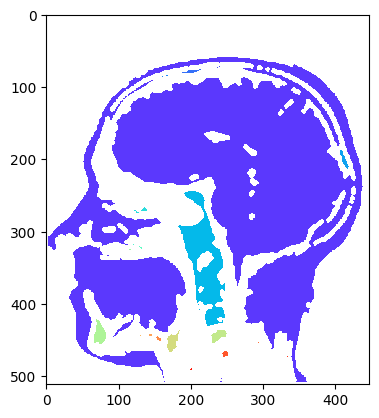

In [309]:
# Create a `labels` overlay
overlay = np.where(labels > 0, labels, np.nan)

# Use imshow to plot the overlay
plt.imshow(overlay, cmap='rainbow')

<h2>Select objects</h2>
Labels are like object "handles" - they give you a way to pick up whole sets of pixels at a time. To select a particular object:

1. Find the label value associated with the object.<br>
2. Create a mask of matching pixels.<br>


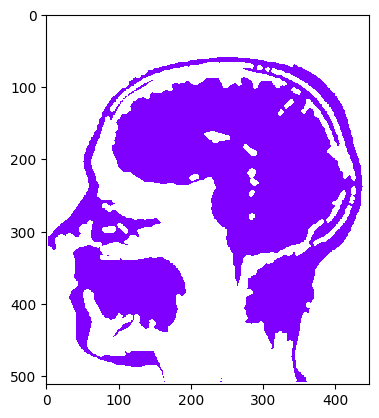

In [310]:
# Label the image "mask"
labels, nlabels = ndi.label(mask)

# Select left ventricle pixels
lv_val = labels[128, 128]
lv_mask = np.where(labels == lv_val, 1, np.nan)

# Overlay selected label
plt.imshow(lv_mask, cmap='rainbow')
plt.show()

<h2>Extract objects</h2>
Extracting objects from the original image eliminates unrelated pixels and provides new images that can be analyzed independently.

The key is to crop images so that they only include the object of interest. The range of pixel indices that encompass the object is the bounding box.

Here, We will use ndi.find_objects() to create a new image containing only the left ventricle.

Number of objects: 1
Indices for first box: (slice(59, 510, None), slice(2, 446, None))


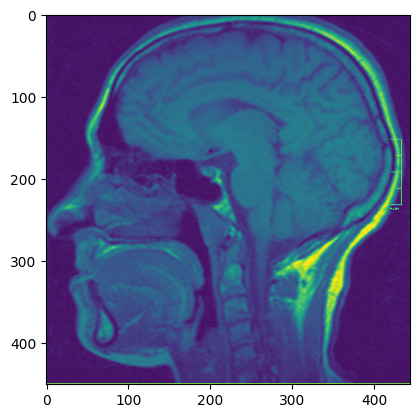

In [311]:
# Create left ventricle mask
labels, nlabels = ndi.label(mask)
lv_val = labels[128, 128]
lv_mask = np.where(labels == lv_val, 1, 0)

# Find bounding box of left ventricle
bboxes = ndi.find_objects(lv_mask)
print('Number of objects:', len(bboxes))
print('Indices for first box:', bboxes[0])

# Crop to the left ventricle (index 0)
im_lv = im[bboxes[0]]

# Plot the cropped image
plt.imshow(im_lv)